In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/nifty50-data/Nifty50.csv', parse_dates=[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3930 non-null   datetime64[ns]
 1   Open       3900 non-null   float64       
 2   High       3900 non-null   float64       
 3   Low        3900 non-null   float64       
 4   Close      3900 non-null   float64       
 5   Adj Close  3900 non-null   float64       
 6   Volume     3900 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 215.0 KB


In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Date', ylabel='Adj Close'>

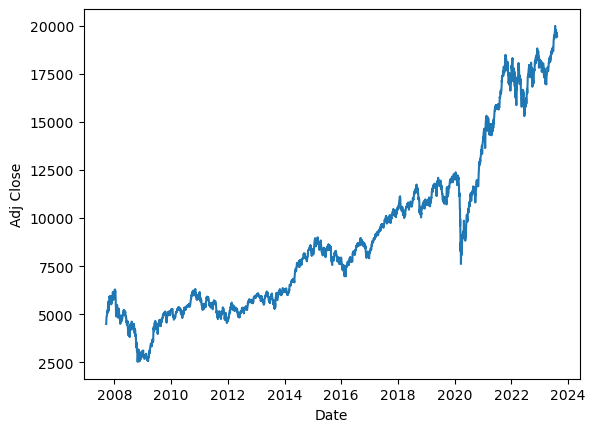

In [3]:
from seaborn import lineplot
lineplot(data=df, x='Date', y='Adj Close')

We expect our price columns to be highly correlated because daily price swings will typically be a small percentage of the price, whatever the price level is.

<Axes: >

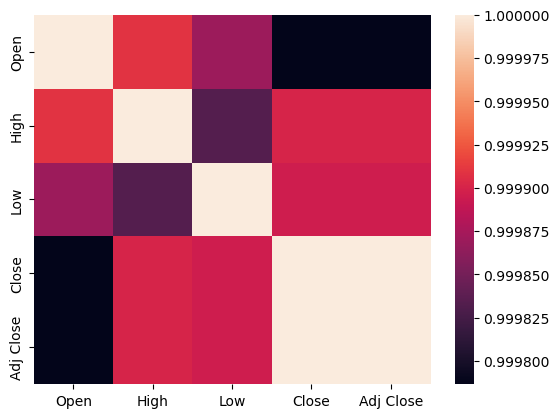

In [4]:
from seaborn import heatmap
heatmap(data=df.drop(columns=['Date', 'Volume']).corr())

<Axes: xlabel='Low', ylabel='High'>

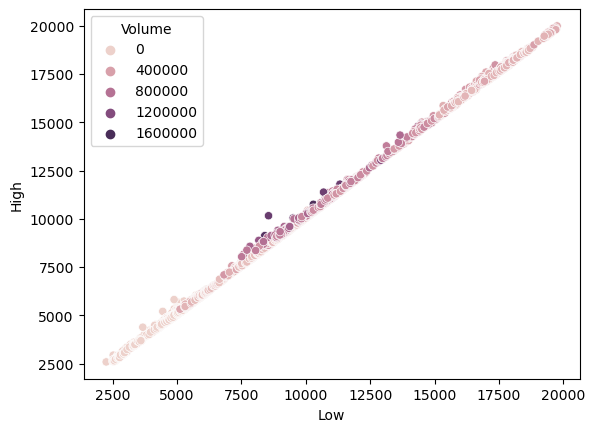

In [5]:
from seaborn import scatterplot
scatterplot(data=df, x='Low', y='High', hue='Volume')

It is probably not surprising that Volume is sensitive to both the price level and the daily volatility.

We expect daily volatility to be normally distributed. Is it?

<Axes: ylabel='Frequency'>

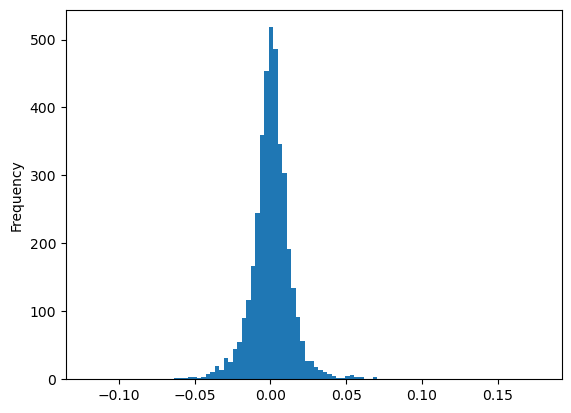

In [6]:
df['open_daily_vol'] = df['Open'].pct_change(1)
df['open_daily_vol'].plot.hist(bins=100)